# Applying PCA to visualize high-dimensional data

___

_Here we will discuss a technique for reducing the dimensions of data called
Principal Component Analysis (PCA). Dimensionality reduction can be used for several reasons: _
1. Mitigate problems caused by the curse of dimensionality. As the dimensions of a data set increases, the number of samples required for an estimator to generalize increases exponentially. Acquiring such large data may be infeasible in some applications, and learning from large data sets requires more memory and processing power. Furthermore, the sparseness of data often increases with its dimensions. It can become more difficult to detect similar instances in high-dimensional space as all of the instances are similarly sparse.
2. Dimensionality reduction can be used to compress data while minimizing the amount of information that is lost.
3. Third, understanding the structure of data with hundreds of dimensions can be difficult; but we can still gain some insights into its structure by reducing it to two or three principal components

_Using PCA, an n-dimensional dataset can be reduced by projecting the dataset onto a k-dimensional subspace, where k is less than n._
## Learning to visualize a high-dimensional dataset:

The Fisher's Iris data set is a collection of fifty samples from each of
the three species of Iris: Iris setosa, Iris virginica, and Iris versicolor. The explanatory
variables are measurements of the length and width of the petals and sepals of the
flowers. The Iris dataset is commonly used to test classification models, and is included
with scikit-learn. Here we'll reduce the iris dataset's four dimensions so that we can
visualize it in two dimensions.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
# Importing the built-in iris dataset from sklearn.
from sklearn.datasets import load_iris

## Instantiating a PCA estimator:
The PCA class takes a number of principal components to retain as a hyperparameter. Like the
other estimators, PCA exposes a fit_transform() method that returns the reduced
data matrix.

In [2]:
data = load_iris()
y = data.target
X = data.data
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

## Assembling and Plotting the reduced data:

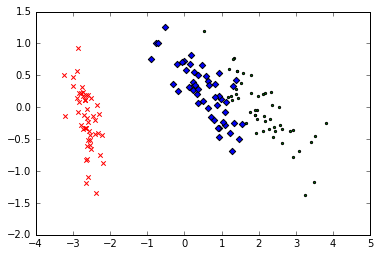

In [3]:
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

The reduced instances are plotted in the above figure. Each of the dataset's three
classes is indicated by its own marker style. From this two-dimensional view of the
data, it is clear that one of the classes can be easily separated from the other two
overlapping classes. It would be difficult to notice this structure without a graphical
representation. This insight can inform our choice of classification model.

## The Problem: Face recognition with PCA
Now let's apply PCA to a face-recognition problem. Face recognition is the
supervised classification task of identifying a person from an image of his or her
face. 

## The Data Set: 
In this example, we will use a data set called Our Database of Faces from AT&T
Laboratories, Cambridge. The data set contains ten images each of forty people.
The images were created under different lighting conditions, and the subjects varied
their facial expressions. The images are gray scale and 92 x 112 pixels in dimension.

This dataset can be downloaded from http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip 

While these images are small, a feature vector that encodes the intensity of every
pixel will have 10,304 dimensions. Training from such high-dimensional data could
require many samples to avoid over-fitting. Instead, we will use PCA to compactly
represent the images in terms of a small number of principal components.

We can reshape the matrix of pixel intensities for an image into a vector, and
create a matrix of these vectors for all of the training images. Each image is a
linear combination of this data set's principal components. In the context of face
recognition, these principal components are called eigenfaces. The eigenfaces can
be thought of as standardized components of faces. Each face in the data set can
be expressed as some combination of the eigenfaces, and can be approximated as a
combination of the most important eigenfaces:

In [14]:
from os import walk, path
import sys
sys.path.append('C:\Miniconda2\Lib\site-packages')
import numpy as np
import mahotas as mh
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X = []
y = []

## Loading our Image data into Numpy arrays

In [15]:
for dir_path, dir_names, file_names in walk('datasets/att/s1'):
    for fn in file_names:
        if fn[-3:] == 'pgm':
            image_filename = path.join(dir_path, fn)
            # Reshaping image feature matrices into vectors
            X.append(scale(mh.imread(image_filename, as_grey=True).reshape(10304).astype('float32')))
            y.append(dir_path)

X = np.array(X)

RuntimeError: This format (pgm) is unknown to imread

## Randomly split the images into training and test sets, and fitting the PCA object on the training set:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=150)

## Training the classifier:
We reduce all of the instances to 150 dimensions and train a logistic regression
classifier. The data set contains forty classes; scikit-learn automatically creates
binary classifiers using the one versus all strategy behind the scenes.

In [31]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print('The original dimensions of the training data were：{}'.format(X_train.shape))
print('The reduced dimensions of the training data are：{}'.format(X_train_reduced.shape))
classifier = LogisticRegression()
accuracies = cross_val_score(classifier, X_train_reduced, y_train)

C:\Miniconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.

## Evaluating our Model's performance:
Finally, we evaluate the performance of the classifier using cross-validation and a
test set. The average per-class F1 score of the classifier trained on the full data was
0.94, but required significantly more time to train and could be prohibitively slow in
an application with more training instances:

In [ ]:
print 'Cross validation accuracy:', np.mean(accuracies),accuracies 
classifier.fit(X_train_reduced, y_train)
predictions = classifier.predict(X_test_reduced)
print classification_report(y_test, predictions)

## Summary
Through these examples, we examined the problem of dimensionality reduction.
High-dimensional data cannot be visualized easily. They may also suffer from the curse of dimensionality; estimators require many samples to learn to generalize from high-dimensional data. We mitigated these problems
using a technique called principal component analysis, which reduces a high-dimensional, possibly-correlated data set to a lower-dimensional set of uncorrelated principal components by projecting the data onto a lower-dimensional
subspace. We used principal component analysis to visualize the four-dimensional Iris data set in two dimensions, and build a face-recognition system.